In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [3]:
df = pd.read_csv("./datasets/fixed_battery_log.csv")
df = df.drop(df.columns[0],axis=1)
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [5]:
df["weekday"] = df["date"].dt.dayofweek
df["time_to_num"]=df["date"].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

In [6]:
def Frequency_Distribution(data, class_width=None):
    data = np.asarray(data)
    if class_width is None:
        class_size = int(np.log2(data.size).round()) + 1
        class_width = round((data.max() - data.min()) / class_size)

    bins = np.arange(0, data.max()+class_width+1, class_width)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))

In [7]:
for i in range(len(users)):
    User_F_data = Frequency_Distribution(df.loc[(df["User"] == users[i]) & 
                                                (df["state"] == "ON") & 
                                                (df["date"] > dt.datetime(2021,12,1)) & 
                                                (df["date"] < dt.datetime(2022,1,31))]["battery"])
#     User_F_data.plot.bar(x="階級値",y="度数",width=1,ec="k")
#     plt.savefig("bs_2_results/%s_%d.jpg" % (users[i],i))

In [8]:
for i in range(0,7):
    User_F_data_2 = Frequency_Distribution(df.loc[(df["User"] == "Narita") & 
                                                (df["state"] == "ON") & 
                                                (df["date"] > dt.datetime(2021,12,1)) & 
                                                (df["date"] < dt.datetime(2022,1,31)) &
                                                (df["weekday"] == i)]["battery"])
#     User_F_data_2.plot.bar(x="階級値",y="度数",width=1,ec="k")
#     plt.savefig("bs_2_results/%s_%d.jpg" % (users[i],i))

In [9]:
Nari_data = df.loc[(df["User"] == "Narita") & 
                     (df["state"] == "ON") & 
                       (df["date"] > dt.datetime(2021,12,1)) & 
                         (df["date"] < dt.datetime(2022,1,31))]

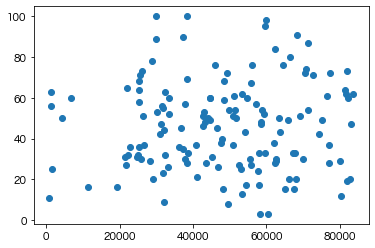

In [10]:
plt.plot(Nari_data["time_to_num"],Nari_data["battery"],"o")
plt.show()

In [11]:
Nari_data_b_and_tnum = Nari_data.loc[:,["time_to_num","battery"]]

In [13]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
x = Nari_data_b_and_tnum[["time_to_num"]]
y = Nari_data_b_and_tnum[["battery"]]
model_lr.fit(x,y)

LinearRegression()

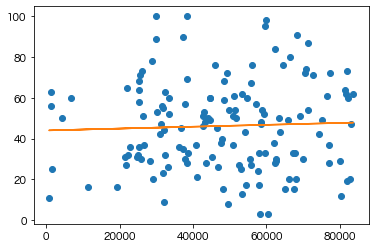

モデル関数の回帰変数 w1: 0.000
モデル関数の切片 w2: 43.961
y= 0.000x + 43.961
決定係数 R^2：  0.0017619929041249316


In [14]:
plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))